In [1]:
#https://www.kaggle.com/jesuraj/titanic-deepnet-using-keras
#import required packages
import numpy as np 
import pandas as pd 
import scipy as si
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

C:\Users\hiroa\Anaconda3\envs\py27\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# To list the files in the input directory
#from subprocess import check_output
#print(check_output(["ls", "./data"]).decode("utf8"))

In [3]:
#Read train & test csv files
train=pd.read_csv("./data/org/train.csv")
test=pd.read_csv("./data/org/test.csv")

In [4]:
#EDA analysis for train & test data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#Numerical variables descriptive analysis
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Categorical variable analysis
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jussila, Mr. Eiriik",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
#To get descriptor inforamtion
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
# Data preparation for keras model
# To keep only objects
train_obj = train.select_dtypes(include=['object']).copy()
train_obj.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [10]:
# To check the frequency
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train=train.replace(["male","female"],[0,1])

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train=train.replace(['S','C','Q'],[0,1,2])

In [15]:
train= train.fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0.0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.6+ KB


In [17]:
x=train[["PassengerId","Pclass", "Sex","Age","SibSp","Parch","Fare","Embarked"]]   
y=train[["Survived"]]
x = x.astype(np.float32).values
y = y.astype(np.float32).values

In [18]:
#Test data preparation
test = test.replace(["male", "female"], [0,1])
test = test.replace(["S", "C", "Q"], [0,1,2])
test= test.fillna(0)

In [19]:
x_test=test[["PassengerId","Pclass", "Sex","Age","SibSp","Parch","Fare","Embarked"]]  
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [20]:
# Import Keras packages
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Activation
#from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
# data split
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold

C:\Users\hiroa\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
seed = 1234
np.random.seed(seed)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.33)

In [23]:
x.shape[:]

(891, 8)

In [24]:
y.shape[:]

(891, 1)

In [25]:
x_train.shape[:]

(294, 8)

In [26]:
x_test.shape[:]

(597, 8)

In [27]:
y_train.shape[:]

(294, 1)

In [28]:
y_test.shape[:]

(597, 1)

In [29]:
from keras import regularizers
weight_decay = 0.01

# Define Model
model = Sequential()

#input layer
#model.add(Dense(8, input_dim=(8), kernel_initializer='he_normal', activity_regularizer=regularizers.l1(weight_decay)))
model.add(Dense(8, input_dim=(8), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(0.2))

# hidden layers1
#model.add(Dense(8, kernel_initializer='he_normal'))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(Dropout(0.2))

# hidden layers2
model.add(Dense(8, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))

# hidden layers4
model.add(Dense(8, input_dim=(8), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(0.3))

# output layer
model.add(Dense(1, activation='sigmoid'))

In [30]:
#Complie
from keras import optimizers

optimizer = optimizers.Adam(amsgrad=True)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [33]:
# Learning
from keras.callbacks import EarlyStopping, ModelCheckpoint

#callback_es = EarlyStopping(monitor='val_acc', patience=10, mode='auto', verbose=1)
callback_es = EarlyStopping(monitor='val_acc', patience=100, mode='auto', verbose=1)
callback_op = ModelCheckpoint(filepath='weights.{epoch:02d}.hdf5')

#model.fit(x, y, nb_epoch=1000, batch_size=100, callbacks=[callback_es, callback_op])
history = model.fit(x, y, nb_epoch=1000, batch_size=50, validation_split=0.5, verbose=1, callbacks=[callback_es])
#history = model.fit(x, y, nb_epoch=1000, batch_size=50, verbose=1, callbacks=[callback_es])

Train on 445 samples, validate on 446 samples
Epoch 1/1000
445/445 [==============================] - 0s 70us/step - loss: 0.4672 - acc: 0.7820 - val_loss: 0.4757 - val_acc: 0.7892
Epoch 2/1000
445/445 [==============================] - 0s 72us/step - loss: 0.4791 - acc: 0.7685 - val_loss: 0.4752 - val_acc: 0.7937
Epoch 3/1000
445/445 [==============================] - 0s 76us/step - loss: 0.4556 - acc: 0.8045 - val_loss: 0.5512 - val_acc: 0.7197
Epoch 4/1000
445/445 [==============================] - 0s 74us/step - loss: 0.4705 - acc: 0.7888 - val_loss: 0.5099 - val_acc: 0.7646
Epoch 5/1000
445/445 [==============================] - 0s 76us/step - loss: 0.4577 - acc: 0.8000 - val_loss: 0.4668 - val_acc: 0.7915
Epoch 6/1000
 50/445 [==>...........................] - ETA: 0s - loss: 0.3752 - acc: 0.8000

C:\Users\hiroa\Anaconda3\envs\py27\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


445/445 [==============================] - 0s 85us/step - loss: 0.4705 - acc: 0.7753 - val_loss: 0.4780 - val_acc: 0.7892
Epoch 7/1000
445/445 [==============================] - 0s 85us/step - loss: 0.4622 - acc: 0.7933 - val_loss: 0.4839 - val_acc: 0.7915
Epoch 8/1000
445/445 [==============================] - 0s 81us/step - loss: 0.4789 - acc: 0.7978 - val_loss: 0.4877 - val_acc: 0.7960
Epoch 9/1000
445/445 [==============================] - 0s 74us/step - loss: 0.4770 - acc: 0.7843 - val_loss: 0.4827 - val_acc: 0.7960
Epoch 10/1000
445/445 [==============================] - 0s 70us/step - loss: 0.4646 - acc: 0.8045 - val_loss: 0.4748 - val_acc: 0.7870
Epoch 11/1000
445/445 [==============================] - 0s 94us/step - loss: 0.4596 - acc: 0.8045 - val_loss: 0.4803 - val_acc: 0.7848
Epoch 12/1000
445/445 [==============================] - 0s 81us/step - loss: 0.4647 - acc: 0.7933 - val_loss: 0.5410 - val_acc: 0.7309
Epoch 13/1000
445/445 [==============================] - 0s 85us/

445/445 [==============================] - 0s 83us/step - loss: 0.4703 - acc: 0.7753 - val_loss: 0.5319 - val_acc: 0.7422
Epoch 67/1000
445/445 [==============================] - 0s 74us/step - loss: 0.4661 - acc: 0.7955 - val_loss: 0.4935 - val_acc: 0.7915
Epoch 68/1000
445/445 [==============================] - 0s 79us/step - loss: 0.4647 - acc: 0.8135 - val_loss: 0.4731 - val_acc: 0.7937
Epoch 69/1000
445/445 [==============================] - 0s 83us/step - loss: 0.4852 - acc: 0.7888 - val_loss: 0.5022 - val_acc: 0.7870
Epoch 70/1000
445/445 [==============================] - 0s 81us/step - loss: 0.4753 - acc: 0.7978 - val_loss: 0.5188 - val_acc: 0.7713
Epoch 71/1000
445/445 [==============================] - 0s 81us/step - loss: 0.4703 - acc: 0.7955 - val_loss: 0.4738 - val_acc: 0.8004
Epoch 72/1000
445/445 [==============================] - 0s 67us/step - loss: 0.4634 - acc: 0.8022 - val_loss: 0.5103 - val_acc: 0.7623
Epoch 73/1000
445/445 [==============================] - 0s 67

445/445 [==============================] - 0s 67us/step - loss: 0.4561 - acc: 0.8135 - val_loss: 0.4848 - val_acc: 0.7892
Epoch 00126: early stopping


In [57]:
y_pred = model.predict(x_test)
y_pred =(y_pred>0.5)

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[350  22]
 [ 93 132]]


In [59]:
predictions = pd.DataFrame(y_pred)

In [60]:
predictions.head()

,0
0,True
1,False
2,False
3,True
4,False


In [61]:
titanic_sub=pd.concat([test[["PassengerId"]], predictions], axis = 1)
titanic_sub=titanic_sub.rename(columns={0:'Survived'})

In [53]:
titanic_sub.head()

,PassengerId,Survived
0,892.0,True
1,893.0,False
2,894.0,False
3,895.0,True
4,896.0,False


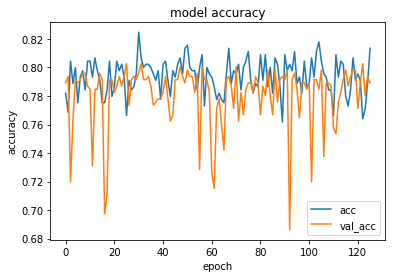

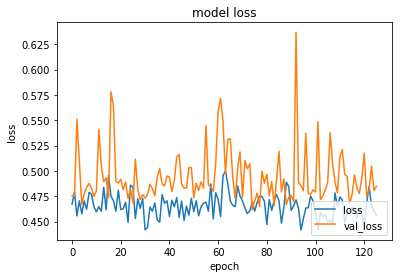

In [40]:
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)